In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv('student-por.csv', delimiter=';')

# 1st question

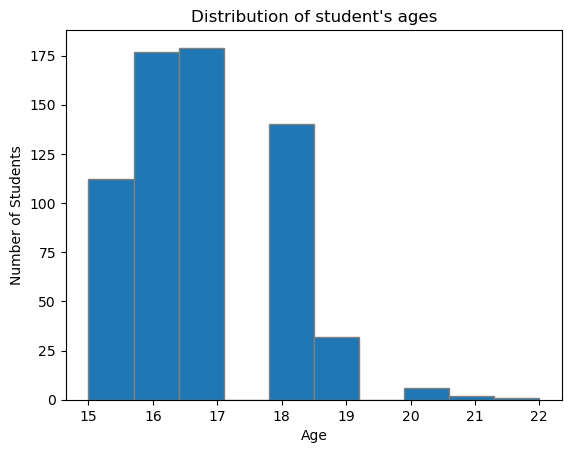

In [3]:
plt.hist(df['age'], edgecolor='grey')
plt.title('Distribution of student\'s ages')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()

# 2nd question

In [4]:
distr = df['school'].value_counts()
distr

GP    423
MS    226
Name: school, dtype: int64

# 3rd question

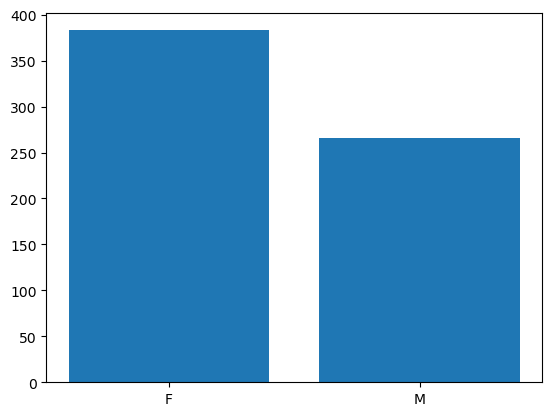

In [5]:
genders = df['sex'].value_counts()
plt.bar(genders.index, genders)
plt.show()

# 4th question

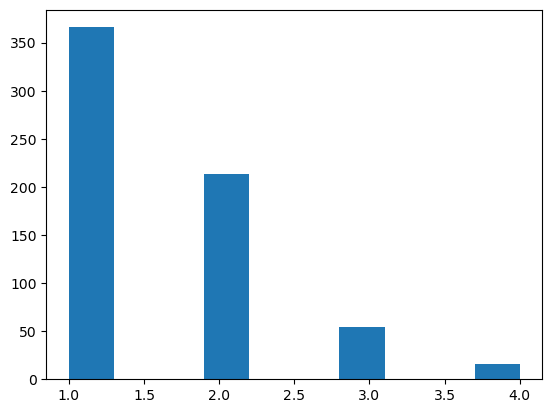

In [6]:
plt.hist(df['traveltime'])
plt.show()

# 5th question

In [7]:
cross_tabulation = pd.crosstab(df['G1'], df['studytime'])
cross_tabulation

studytime,1,2,3,4
G1,,,,
0,0,1,0,0
4,1,1,0,0
5,2,2,0,1
6,6,3,0,0
7,16,14,3,0
8,19,21,2,0
9,35,25,4,1
10,34,40,14,7
11,29,42,16,4


# 6th question

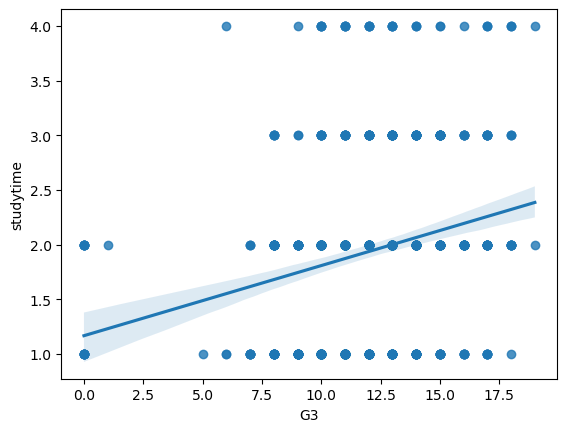

In [8]:
sns.regplot(x = df['G3'], y = df['studytime'])
plt.show()

# 7th question

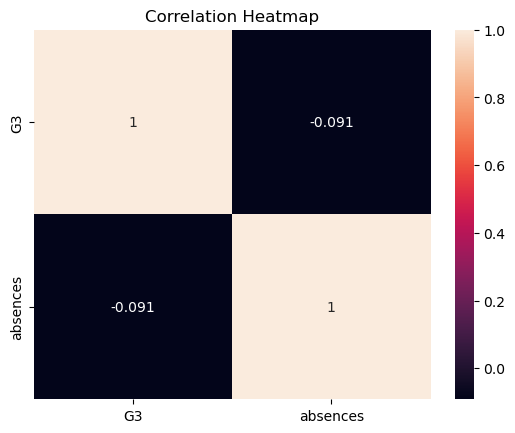

In [9]:
correlation_matrix = df[['G3', 'absences']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# 8th question

In [10]:
t_statistics, p_value = scipy.stats.ttest_ind(df[df['address']=='U']['G3'], df[df['address']=='R']['G3'])
alpha = 0.05

print('T statistics: ' + str(t_statistics))
print('P value: ' + str(p_value))

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

T statistics: 4.325264214751824
P value: 1.764153460922413e-05
Reject the null hypothesis: There is a significant difference between the means.


# 9th question

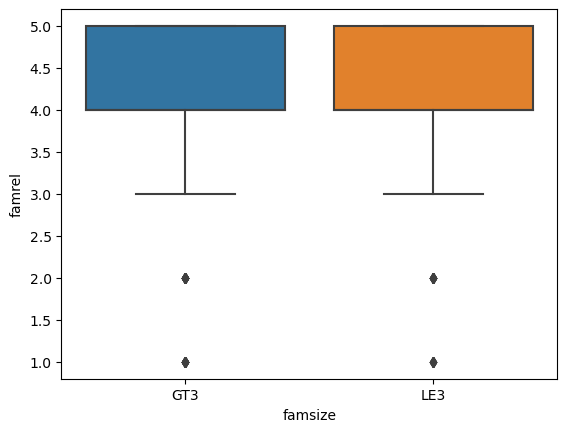

In [11]:
sns.boxplot(x = 'famsize', y = 'famrel', data = df)
plt.show()

# 10th question

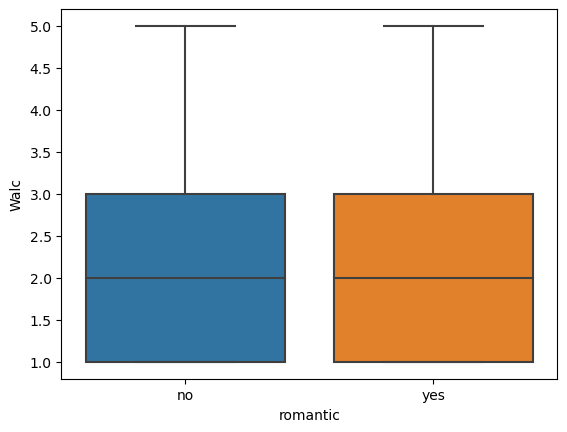

In [12]:
sns.boxplot(x = 'romantic', y = 'Walc', data = df)
plt.show()

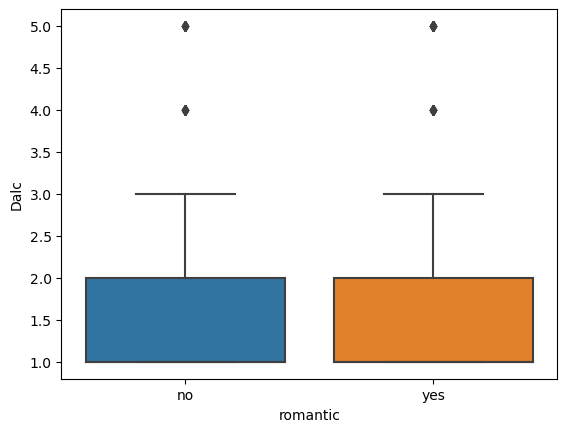

In [13]:
sns.boxplot(x = 'romantic', y = 'Dalc', data = df)
plt.show()

# 11th question

In [14]:
correlation_coefficient = df['Medu'].corr(df['Fedu'])

print(f"The correlation coefficient between Medu and Fedu is: {correlation_coefficient}")

The correlation coefficient between Medu and Fedu is: 0.6474766091364951


# 12th question

In [15]:
from scipy.stats import ttest_ind

grouped_data = df.groupby('Pstatus')['G3']

mean_grades = grouped_data.mean()

print("Mean Grades based on Cohabitation Status:")
print(mean_grades)

cohabitation_groups = [grouped_data.get_group('A'), grouped_data.get_group('T')]
t_statistic, p_value = ttest_ind(*cohabitation_groups)

print(f"\nT-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("\nThere is a significant difference in mean grades based on cohabitation status.")
else:
    print("\nThere is no significant difference in mean grades based on cohabitation status.")

Mean Grades based on Cohabitation Status:
Pstatus
A    11.912500
T    11.905097
Name: G3, dtype: float64

T-Statistic: 0.019176989794419484
P-Value: 0.9847058259502668

There is no significant difference in mean grades based on cohabitation status.


# 13th question

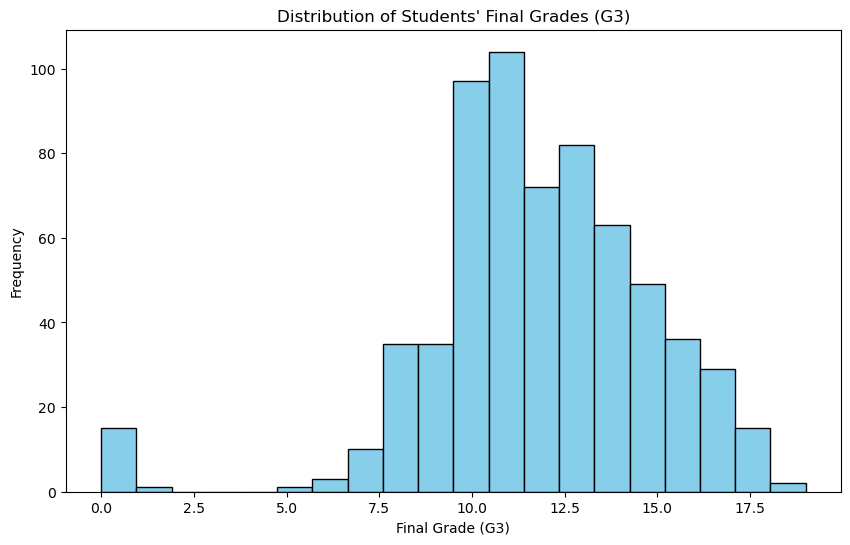

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['G3'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Students\' Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')

plt.show()

# 14th question

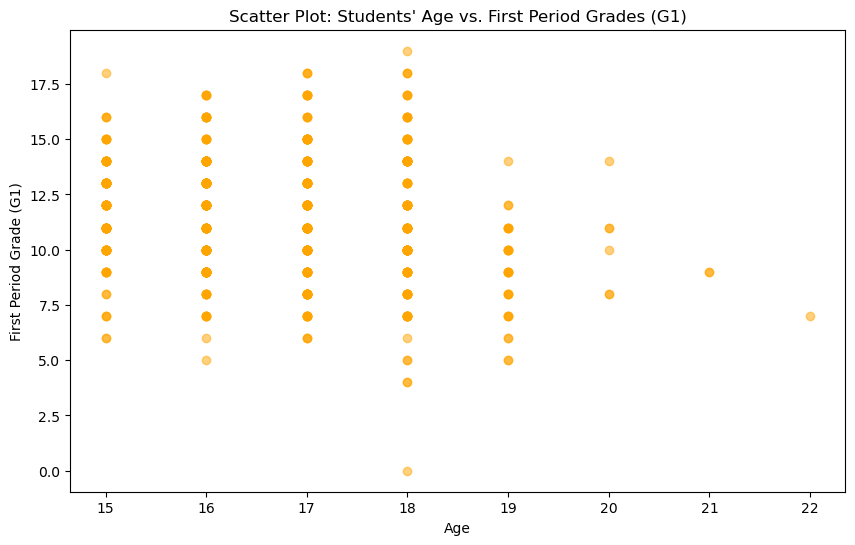

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['G1'], color='orange', alpha=0.5)

plt.title('Scatter Plot: Students\' Age vs. First Period Grades (G1)')
plt.xlabel('Age')
plt.ylabel('First Period Grade (G1)')

plt.show()

# 15th question

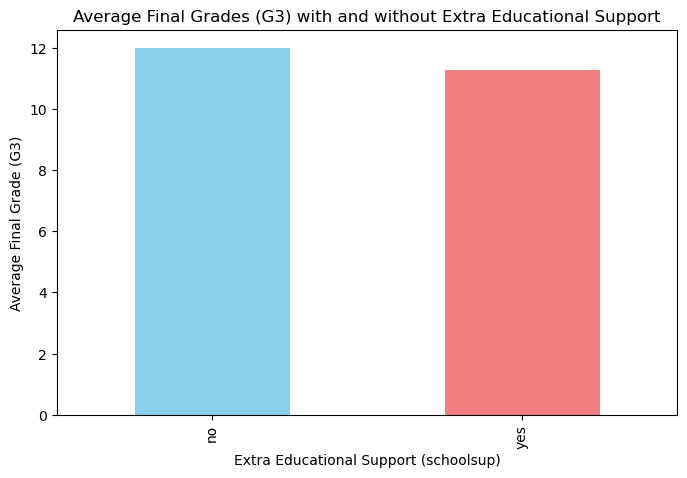

In [18]:
grouped_data = df.groupby('schoolsup')['G3'].mean()

plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('Average Final Grades (G3) with and without Extra Educational Support')
plt.xlabel('Extra Educational Support (schoolsup)')
plt.ylabel('Average Final Grade (G3)')

plt.show()

# 16th question

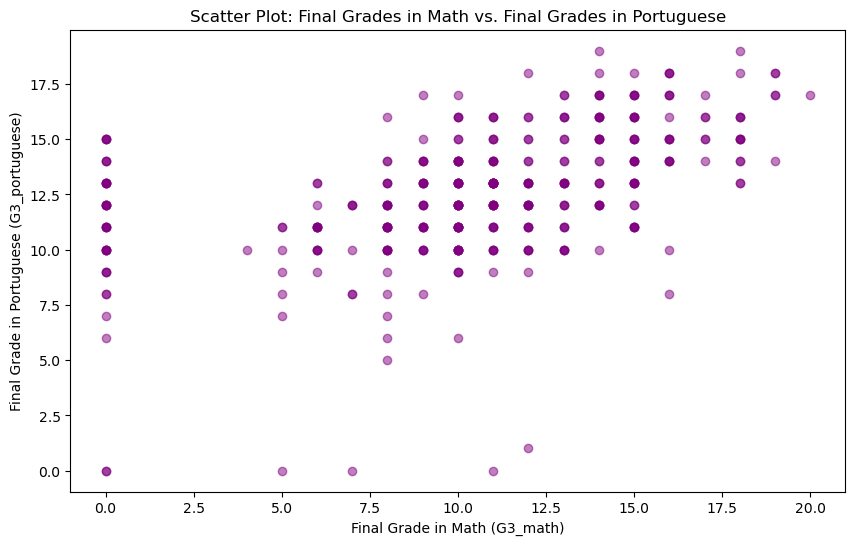

In [19]:
math_df = pd.read_csv('student-mat.csv', delimiter=';')
portuguese_df = pd.read_csv('student-por.csv', delimiter=';')
both = pd.merge(math_df, portuguese_df,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

plt.figure(figsize=(10, 6))
plt.scatter(both['G3_x'], both['G3_y'], color='purple', alpha=0.5)

plt.title('Scatter Plot: Final Grades in Math vs. Final Grades in Portuguese')
plt.xlabel('Final Grade in Math (G3_math)')
plt.ylabel('Final Grade in Portuguese (G3_portuguese)')

plt.show()

In [20]:
correlation_coefficient = both['G3_x'].corr(both['G3_y'])
print(f"Correlation Coefficient between G3_math and G3_portuguese: {correlation_coefficient}")


Correlation Coefficient between G3_math and G3_portuguese: 0.4803493619410264


# 17th question

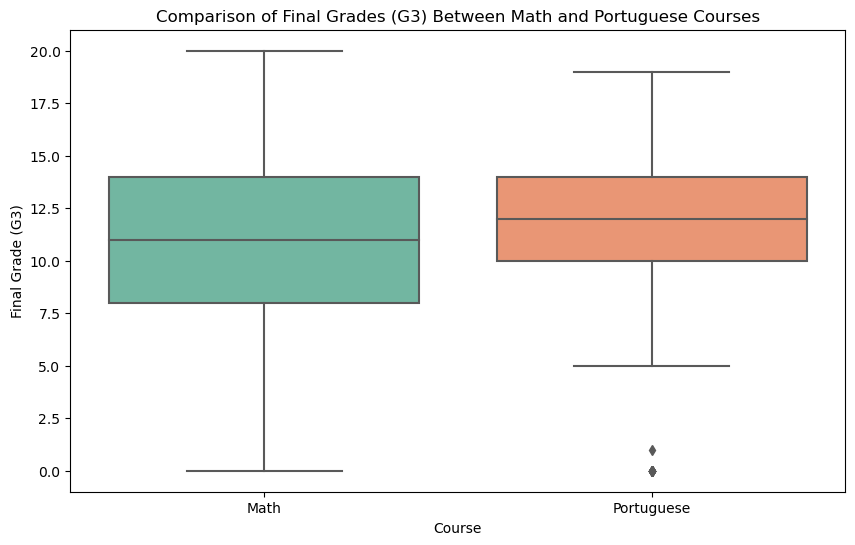

In [21]:
math_df['Course'] = 'Math'
portuguese_df['Course'] = 'Portuguese'

merged_df = pd.concat([math_df, portuguese_df])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Course', y='G3', data=merged_df, palette='Set2')

plt.title('Comparison of Final Grades (G3) Between Math and Portuguese Courses')
plt.xlabel('Course')
plt.ylabel('Final Grade (G3)')

plt.show()

# 18th question

T-Statistic: 2.061992815503971
P-Value: 0.039865332341527636

There is a significant difference in average final grades between male and female students.


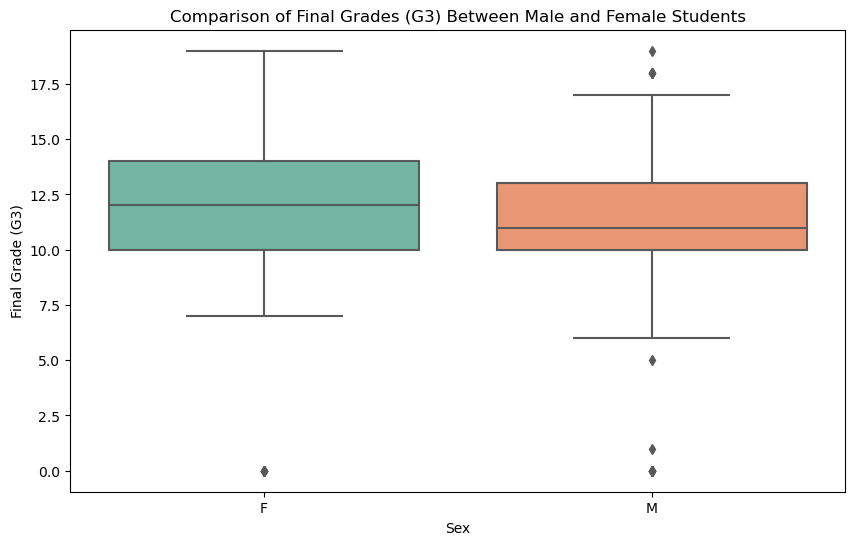

In [22]:
male_grades = math_df[math_df['sex'] == 'M']['G3']
female_grades = math_df[math_df['sex'] == 'F']['G3']

t_statistic, p_value = ttest_ind(male_grades, female_grades)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("\nThere is a significant difference in average final grades between male and female students.")
else:
    print("\nThere is no significant difference in average final grades between male and female students.")

plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3', data=df, palette='Set2')

plt.title('Comparison of Final Grades (G3) Between Male and Female Students')
plt.xlabel('Sex')
plt.ylabel('Final Grade (G3)')

plt.show()

# 19th question

In [1]:
age_bins = [15, 17, 20, 22]
age_labels = ['15-17', '18-20', '21-22']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x='age_group', y='studytime', data=df)
plt.title('Study Time by Age Group')

plt.subplot(1, 2, 2)
sns.boxplot(x='age_group', y='G3', data=df)
plt.title('Final Math Grades (G3) by Age Group')

plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

# 20th question

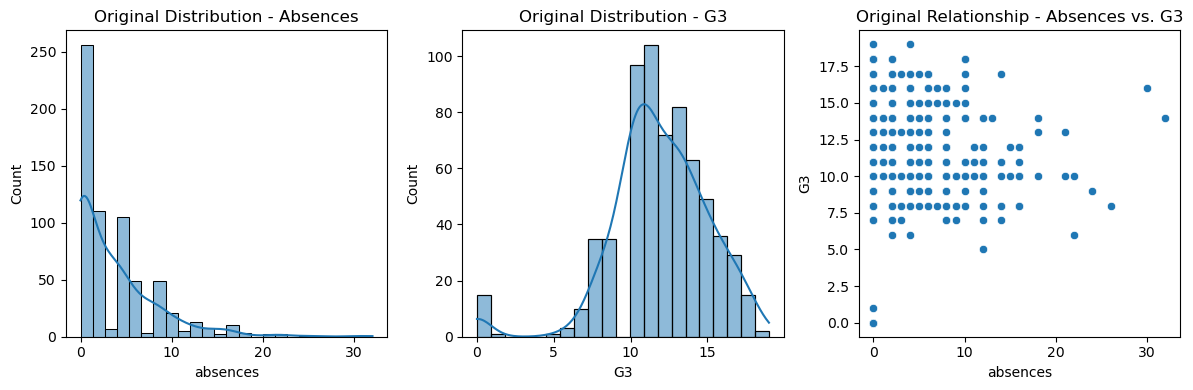

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['absences'], kde=True)
plt.title('Original Distribution - Absences')

plt.subplot(1, 3, 2)
sns.histplot(df['G3'], kde=True)
plt.title('Original Distribution - G3')

plt.subplot(1, 3, 3)
sns.scatterplot(x='absences', y='G3', data=df)
plt.title('Original Relationship - Absences vs. G3')

plt.tight_layout()
plt.show()

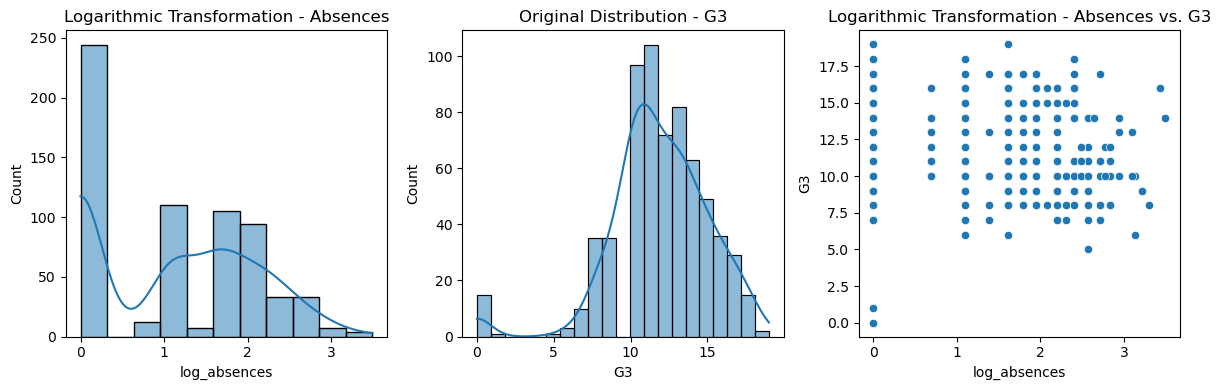

In [25]:
df['log_absences'] = np.log1p(df['absences'])  

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['log_absences'], kde=True)
plt.title('Logarithmic Transformation - Absences')

plt.subplot(1, 3, 2)
sns.histplot(df['G3'], kde=True)
plt.title('Original Distribution - G3')

plt.subplot(1, 3, 3)
sns.scatterplot(x='log_absences', y='G3', data=df)
plt.title('Logarithmic Transformation - Absences vs. G3')

plt.tight_layout()
plt.show()

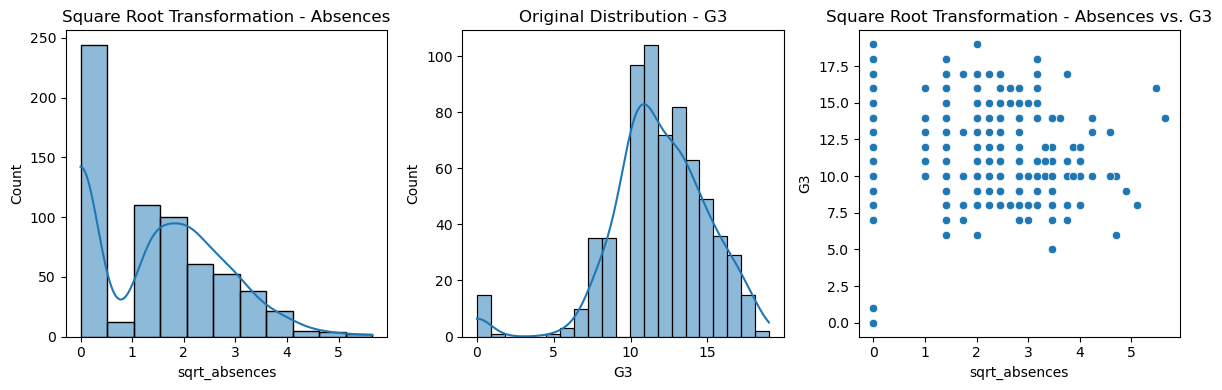

In [26]:
df['sqrt_absences'] = np.sqrt(df['absences'])

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['sqrt_absences'], kde=True)
plt.title('Square Root Transformation - Absences')

plt.subplot(1, 3, 2)
sns.histplot(df['G3'], kde=True)
plt.title('Original Distribution - G3')

plt.subplot(1, 3, 3)
sns.scatterplot(x='sqrt_absences', y='G3', data=df)
plt.title('Square Root Transformation - Absences vs. G3')

plt.tight_layout()
plt.show()

# 21st question

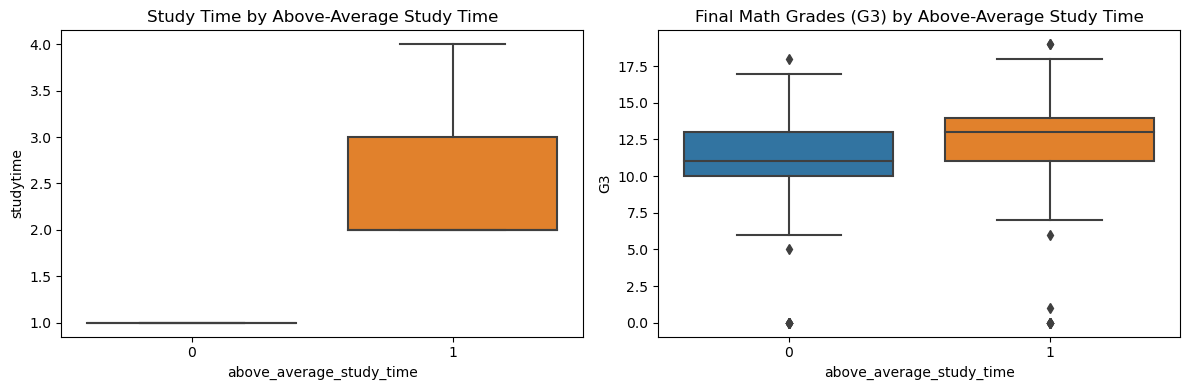

In [27]:
average_study_time = df['studytime'].mean()

df['above_average_study_time'] = (df['studytime'] > average_study_time).astype(int)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x='above_average_study_time', y='studytime', data=df)
plt.title('Study Time by Above-Average Study Time')

plt.subplot(1, 2, 2)
sns.boxplot(x='above_average_study_time', y='G3', data=df)
plt.title('Final Math Grades (G3) by Above-Average Study Time')

plt.tight_layout()
plt.show()

# 22nd question 

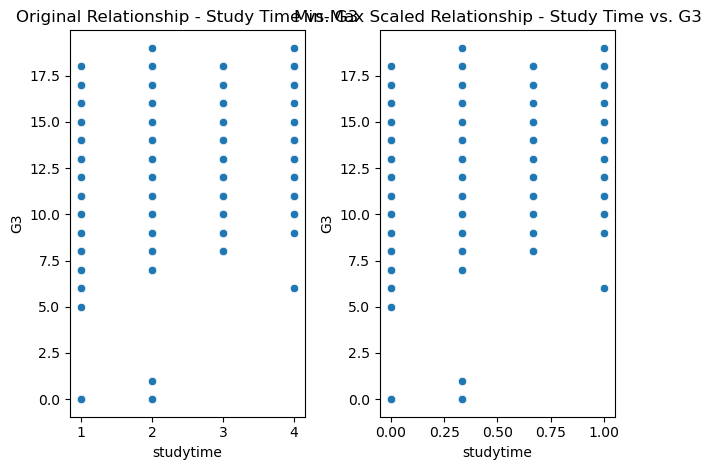

In [61]:
numeric_vars = ['age', 'absences', 'studytime']

minmax_scaler = MinMaxScaler()
data_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df[numeric_vars]), columns=numeric_vars)
data_minmax_scaled['G3'] = df['G3']

standard_scaler = StandardScaler()
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df[numeric_vars]), columns=numeric_vars)
data_standard_scaled['G3'] = df['G3']


plt.subplot(1, 2, 1)
sns.scatterplot(x='studytime', y='G3', data=df)
plt.title('Original Relationship - Study Time vs. G3')

plt.subplot(1, 2, 2)
sns.scatterplot(x='studytime', y='G3', data=data_minmax_scaled)
plt.title('Min-Max Scaled Relationship - Study Time vs. G3')

plt.tight_layout()
plt.show()

# 23rd question

In [29]:
label_encoder = LabelEncoder()
df['reason_encoded'] = label_encoder.fit_transform(df['reason'])

one_hot_encoded = pd.get_dummies(df['Mjob'], prefix='Mjob')
df = pd.concat([df, one_hot_encoded], axis=1)
print(label_encoder.classes_)
df

['course' 'home' 'other' 'reputation']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,age_group,log_absences,sqrt_absences,above_average_study_time,reason_encoded,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,18-20,1.609438,2.000000,1,0,1,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,18-20,1.098612,1.414214,1,0,1,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,15-17,1.945910,2.449490,1,2,1,0,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,15-17,0.000000,0.000000,1,1,0,1,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,15-17,0.000000,0.000000,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,18-20,1.609438,2.000000,1,0,0,0,0,1,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,18-20,1.609438,2.000000,1,0,0,0,0,0,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,18-20,1.945910,2.449490,1,0,0,0,1,0,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,18-20,1.945910,2.449490,0,0,0,0,0,1,0


# 24th question

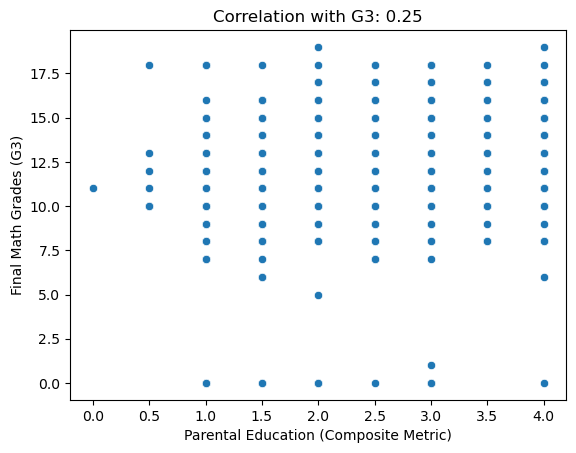

In [30]:
df['Parental_Education'] = (df['Medu'] + df['Fedu']) / 2

correlation = df['Parental_Education'].corr(df['G3'])

sns.scatterplot(x='Parental_Education', y='G3', data=df)
plt.title(f'Correlation with G3: {correlation:.2f}')
plt.xlabel('Parental Education (Composite Metric)')
plt.ylabel('Final Math Grades (G3)')
plt.show()

# 25th question

In [31]:
average_study_time = df.groupby('address')['studytime'].mean()

print("Average Study Time:")
print(average_study_time)

Average Study Time:
address
R    1.852792
U    1.964602
Name: studytime, dtype: float64


# 26th question

In [32]:
label_mapping = {
    1: 'very bad',
    2: 'bad',
    3: 'neutral',
    4: 'good',
    5: 'excellent'
}

df['famrel_labels'] = df['famrel'].map(label_mapping)

print(df[['famrel', 'famrel_labels']])

     famrel famrel_labels
0         4          good
1         5     excellent
2         4          good
3         3       neutral
4         4          good
..      ...           ...
644       5     excellent
645       4          good
646       1      very bad
647       2           bad
648       4          good

[649 rows x 2 columns]


# 27th question

In [33]:
def age_range(series):
    return series.max() - series.min()

school_age_range = df.groupby('school')['age'].agg(age_range)

print("Age Range within Different Schools:")
print(school_age_range)

Age Range within Different Schools:
school
GP    7
MS    5
Name: age, dtype: int64


In [34]:
def percentage_with_internet(series):
    return (series == 'yes').mean() * 100

internet_percentage_by_gender = df.groupby('sex')['internet'].agg(percentage_with_internet)

print("Percentage of Students with Internet Access by Gender:")
print(internet_percentage_by_gender)

Percentage of Students with Internet Access by Gender:
sex
F    74.412533
M    80.075188
Name: internet, dtype: float64


# 28th question

In [35]:
#no need to do it

# 29th question

In [36]:
median_absences_by_schoolsup = df.groupby('schoolsup')['absences'].median()
print('Median absences by Educational Support:')
print(median_absences_by_schoolsup)

Median absences by Educational Support:
schoolsup
no     2.0
yes    2.0
Name: absences, dtype: float64


# 30th question

In [37]:
percentage_higher_by_fedu = df.groupby('Fedu')['higher'].value_counts(normalize=True)[:, 'yes'] * 100
print('Percentage of Students wanting to get Higher Education by Father Education:')
print(percentage_higher_by_fedu)

Percentage of Students wanting to get Higher Education by Father Education:
Fedu
0    100.000000
1     81.034483
2     87.559809
3     93.893130
4     98.437500
Name: higher, dtype: float64


# 31st question

In [38]:
correlation_traveltime_g3 = df['traveltime'].corr(df['G3'])
print(f'Correlation between Travel Time and G3: {correlation_traveltime_g3}')

Correlation between Travel Time and G3: -0.12717296675842063


# 32nd question

In [39]:
weighted_average_g3 = np.average(df['G3'], weights=df['studytime'])
print(f'Weighted average G3 by studytime: {weighted_average_g3}')

Weighted average G3 by studytime: 12.25219473264166


# 33rd question

In [40]:
students_with_highest_alcohol = df.sort_values(by='Walc', ascending=False)
print(f'Top 5 students with highest weekly alcohol consumption: \n')
students_with_highest_alcohol[:5]['Walc']

Top 5 students with highest weekly alcohol consumption: 



359    5
378    5
250    5
263    5
279    5
Name: Walc, dtype: int64

# 34th question

In [41]:
missing_guardian = df['guardian'].isna().sum()
print(f'Before filling missing values: {missing_guardian}')
df['guardian'].fillna('unknown', inplace=True)
missing_guardian = df['guardian'].isna().sum()
print(f'After filling missing values: {missing_guardian}')

Before filling missing values: 0
After filling missing values: 0


# 35th question

In [42]:
most_common_value = df['romantic'].mode()[0]
df['romantic'].fillna(most_common_value, inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,sqrt_absences,above_average_study_time,reason_encoded,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Parental_Education,famrel_labels
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,2.000000,1,0,1,0,0,0,0,4.0,good
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1.414214,1,0,1,0,0,0,0,1.0,excellent
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2.449490,1,2,1,0,0,0,0,1.0,good
3,GP,F,15,U,GT3,T,4,2,health,services,...,0.000000,1,1,0,1,0,0,0,3.0,neutral
4,GP,F,16,U,GT3,T,3,3,other,other,...,0.000000,1,1,0,0,1,0,0,3.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2.000000,1,0,0,0,0,1,0,2.5,excellent
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,2.000000,1,0,0,0,0,0,1,2.0,good
646,MS,F,18,U,GT3,T,1,1,other,other,...,2.449490,1,0,0,0,1,0,0,1.0,very bad
647,MS,M,17,U,LE3,T,3,1,services,services,...,2.449490,0,0,0,0,0,1,0,2.0,bad


# 36th question

In [43]:
pivot_table_study_time = df.pivot_table(
    values='studytime', 
    index='reason', 
    aggfunc=['min', 'max'], 
    )
pivot_table_study_time

,min,max
,studytime,studytime
reason,,
course,1,4
home,1,4
other,1,4
reputation,1,4


# 37th question

In [44]:
has_teacher_parents = df[(df['Fjob']=='teacher') & (df['Mjob']=='teacher')]
print('Students who have both parents as teachers: ')
has_teacher_parents

Students who have both parents as teachers: 


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,sqrt_absences,above_average_study_time,reason_encoded,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Parental_Education,famrel_labels
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,2.000000,1,1,0,0,0,0,1,4.0,good
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,2.000000,0,0,0,0,0,0,1,4.0,excellent
115,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,2.449490,1,0,0,0,0,0,1,4.0,excellent
128,GP,M,16,R,GT3,T,4,4,teacher,teacher,...,2.828427,0,0,0,0,0,0,1,4.0,neutral
147,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,2.449490,0,0,0,0,0,0,1,4.0,good
161,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4.000000,0,0,0,0,0,0,1,4.0,neutral
213,GP,F,16,U,LE3,T,4,4,teacher,teacher,...,0.000000,1,3,0,0,0,0,1,4.0,good
246,GP,M,17,U,GT3,T,4,4,teacher,teacher,...,0.000000,1,3,0,0,0,0,1,4.0,good
257,GP,M,17,U,GT3,T,4,4,teacher,teacher,...,2.449490,0,0,0,0,0,0,1,4.0,good
335,GP,M,18,U,LE3,A,4,4,teacher,teacher,...,0.000000,1,3,0,0,0,0,1,4.0,excellent


# 38th question

In [45]:
df['Fjob'].replace('at_home', 'homemaker', inplace=True)
df['Mjob'].replace('at_home', 'homemaker', inplace=True)

print('Dataframe after replacing \'at_home\' by \'homemaker\'')
print(df)

Dataframe after replacing 'at_home' by 'homemaker'
    school sex  age address famsize Pstatus  Medu  Fedu       Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4  homemaker   teacher   
1       GP   F   17       U     GT3       T     1     1  homemaker     other   
2       GP   F   15       U     LE3       T     1     1  homemaker     other   
3       GP   F   15       U     GT3       T     4     2     health  services   
4       GP   F   16       U     GT3       T     3     3      other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...        ...       ...   
644     MS   F   19       R     GT3       T     2     3   services     other   
645     MS   F   18       U     LE3       T     3     1    teacher  services   
646     MS   F   18       U     GT3       T     1     1      other     other   
647     MS   M   17       U     LE3       T     3     1   services  services   
648     MS   M   18       R     LE3       T     3     2   services   

# 39th question

In [46]:
melted_df = pd.melt(df, id_vars=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","reason","nursery","internet"], value_vars=['Fjob', 'Mjob'], var_name='Parent', value_name='ParentJob')
melted_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,nursery,internet,Parent,ParentJob
0,GP,F,18,U,GT3,A,4,4,course,yes,no,Fjob,teacher
1,GP,F,17,U,GT3,T,1,1,course,no,yes,Fjob,other
2,GP,F,15,U,LE3,T,1,1,other,yes,yes,Fjob,other
3,GP,F,15,U,GT3,T,4,2,home,yes,yes,Fjob,services
4,GP,F,16,U,GT3,T,3,3,home,yes,no,Fjob,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,MS,F,19,R,GT3,T,2,3,course,no,yes,Mjob,services
1294,MS,F,18,U,LE3,T,3,1,course,yes,yes,Mjob,teacher
1295,MS,F,18,U,GT3,T,1,1,course,yes,no,Mjob,other
1296,MS,M,17,U,LE3,T,3,1,course,no,yes,Mjob,services


# 40th question

In [47]:
def assign_letter_grade(score):
    score = int((score/20)*100)
    
    if score>=90:
        return 'A'
    
    elif score>=80:
        return 'B'
    
    elif score>=70:
        return 'C'
    
    elif score>=50:
        return 'D'
    
    else:
        return 'F'

In [48]:
df['LetterGrade'] = df['G3'].apply(assign_letter_grade)
df[['G3', 'LetterGrade']]

,G3,LetterGrade
0,11,D
1,11,D
2,12,D
3,14,C
4,13,D
...,...,...
644,10,D
645,16,B
646,9,F
647,10,D


# 41st question

In [49]:
#no need to do it

# 42nd question

In [50]:
math_df = pd.read_csv('student-mat.csv', delimiter=';')
portuguese_df = pd.read_csv('student-por.csv', delimiter=';')
both = pd.merge(math_df, portuguese_df,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

print('Combined DataFrame: ')
both

Combined DataFrame: 


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# 43rd question

In [51]:
top_gp_students = df[df['school']=='GP'].sort_values(by='G3' , ascending=False)
top_gp_students[:5]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,above_average_study_time,reason_encoded,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Parental_Education,famrel_labels,LetterGrade
338,GP,F,17,R,LE3,T,3,1,services,other,...,1,3,0,0,0,1,0,2.0,neutral,A
416,GP,M,17,U,LE3,A,3,2,other,other,...,1,3,0,0,1,0,0,2.5,good,A
185,GP,M,16,U,GT3,T,1,0,other,other,...,1,3,0,0,1,0,0,0.5,good,A
332,GP,F,18,U,GT3,T,2,2,homemaker,homemaker,...,1,2,1,0,0,0,0,2.0,good,A
314,GP,M,17,R,GT3,T,1,2,homemaker,homemaker,...,1,1,1,0,0,0,0,1.5,neutral,A


# 44th question

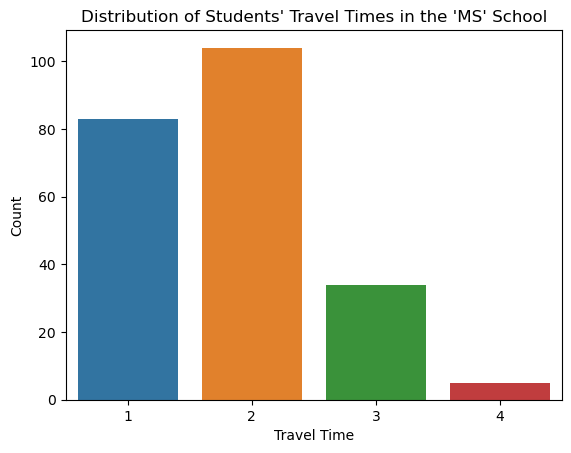

In [52]:
sns.countplot(x='traveltime', data=df[df['school']=='MS'])
plt.title("Distribution of Students' Travel Times in the 'MS' School")
plt.xlabel('Travel Time')
plt.ylabel('Count')
plt.show()

# 45th question

In [53]:
mean_age_by_activities = df.groupby(by='activities')['age'].mean()
print('Mean age by activities')
mean_age_by_activities

Mean age by activities


activities
no     16.808383
yes    16.676190
Name: age, dtype: float64

# 46th question

In [54]:
median_absences_by_group = df.groupby(by=['sex', 'address'])['absences'].median()
print('Median absences by sex and address:')
median_absences_by_group

Median absences by sex and address:


sex  address
F    R          2.0
     U          2.0
M    R          2.0
     U          2.0
Name: absences, dtype: float64

# 47th question

In [55]:
percentage_schoolsup_gp = df[df['school']=='GP']['schoolsup'].value_counts(normalize=True)
print('Percentage of school support in gp school: ')
percentage_schoolsup_gp

Percentage of school support in gp school: 


no     0.867612
yes    0.132388
Name: schoolsup, dtype: float64

# 48th question

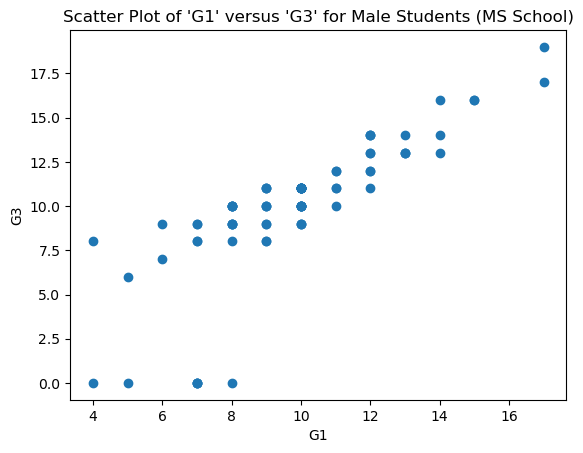

In [56]:
male_ms_students_data = df[(df['sex']=='M') & (df['school']=='MS')]
plt.scatter(male_ms_students_data['G1'], male_ms_students_data['G3'])
plt.title("Scatter Plot of 'G1' versus 'G3' for Male Students (MS School)")
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()

# 49th question

In [57]:
unique_combinations_mask = ~df.duplicated(subset=['Mjob', 'Fjob'], keep=False)
unique_combinations_students = df[unique_combinations_mask]
print('Students with unique Mjob and Fjob that appears only once: ')
unique_combinations_students

Students with unique Mjob and Fjob that appears only once: 


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,above_average_study_time,reason_encoded,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Parental_Education,famrel_labels,LetterGrade
588,MS,F,17,U,GT3,T,4,1,health,homemaker,...,0,0,0,1,0,0,0,2.5,neutral,F


# 50th question

In [58]:
average_grades_by_school_studytime = df.groupby(by=['school', 'studytime'])['G3'].mean()
print('Average G3 for MS and GP in each studytime: ')
average_grades_by_school_studytime

Average G3 for MS and GP in each studytime: 


school  studytime
GP      1            11.529412
        2            12.733010
        3            13.563380
        4            13.407407
MS      1             9.967742
        2            10.757576
        3            12.307692
        4            11.875000
Name: G3, dtype: float64